## UNAD
### Rodolfo Junior
### Agrupamiento en Hierarchical Clustering

PASOS:
1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.
3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.
4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.
5. Entrenar el modelo configurando los diferentes hiperparámetros.
6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.
7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
8. Interpretar, analizar y documentar los resultados obtenidos.

1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [16]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, classification_report, calinski_harabasz_score, davies_bouldin_score

In [18]:
data = pd.read_csv('Mall_Customers.csv')

In [20]:
data.head(40)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [22]:
# Descripción de los datos
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [24]:
# Comprobar valores nulos
data.isnull().sum()
# Comprobar tipos de datos
data.dtypes


CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

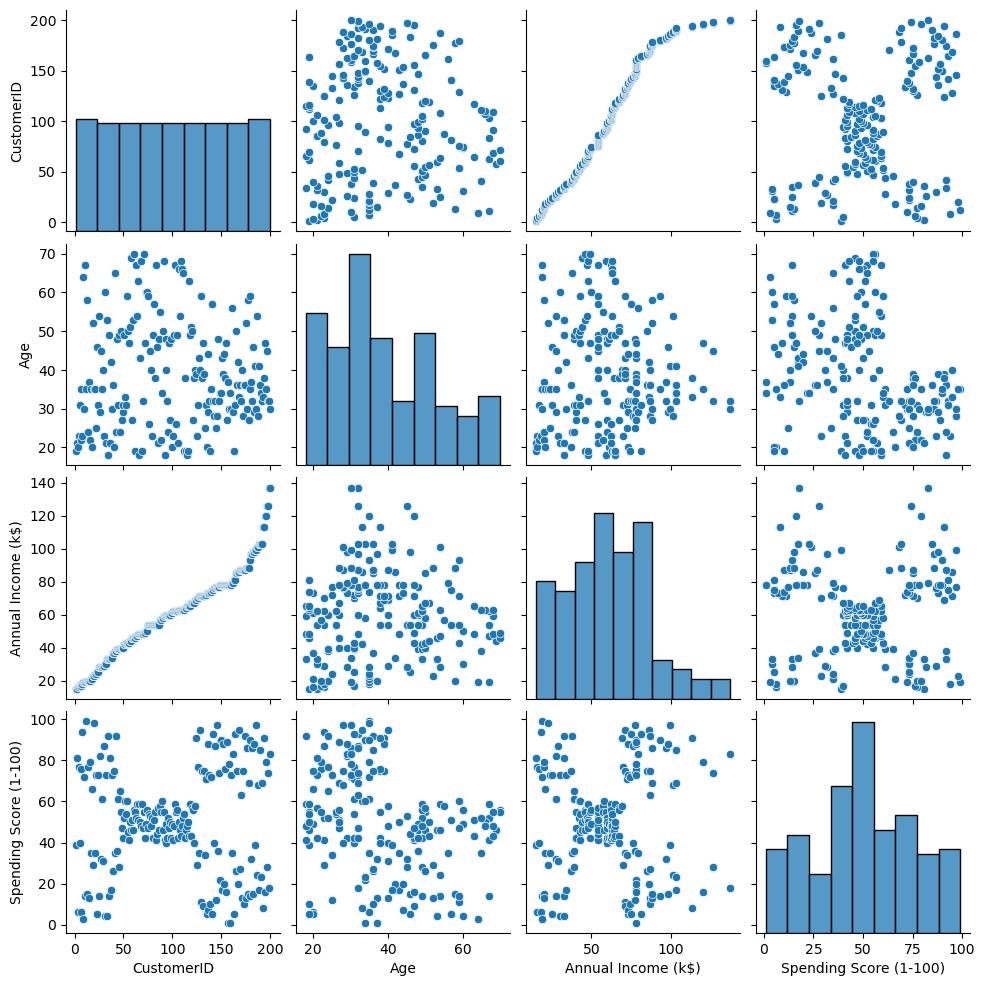

In [26]:
# Visualizar la distribución de las variables
sns.pairplot(data)

Text(0.5, 1.0, 'Distribución del Puntaje de Gasto')

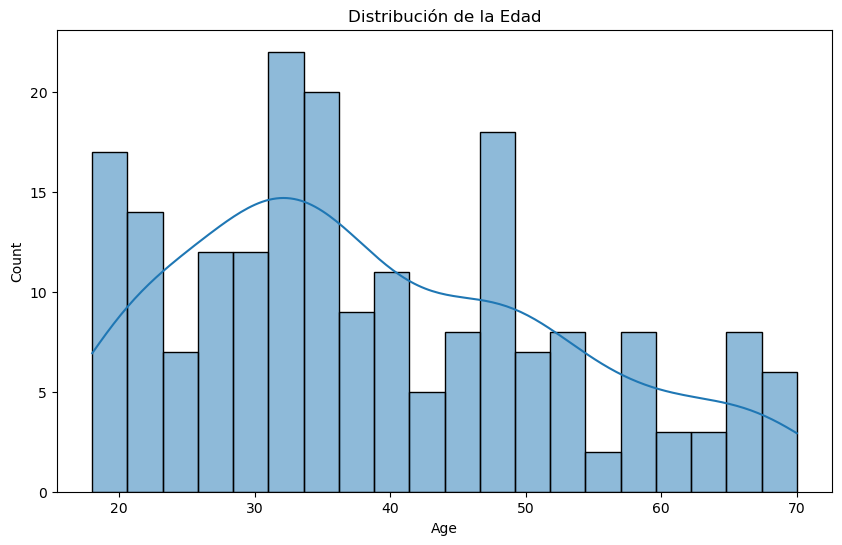

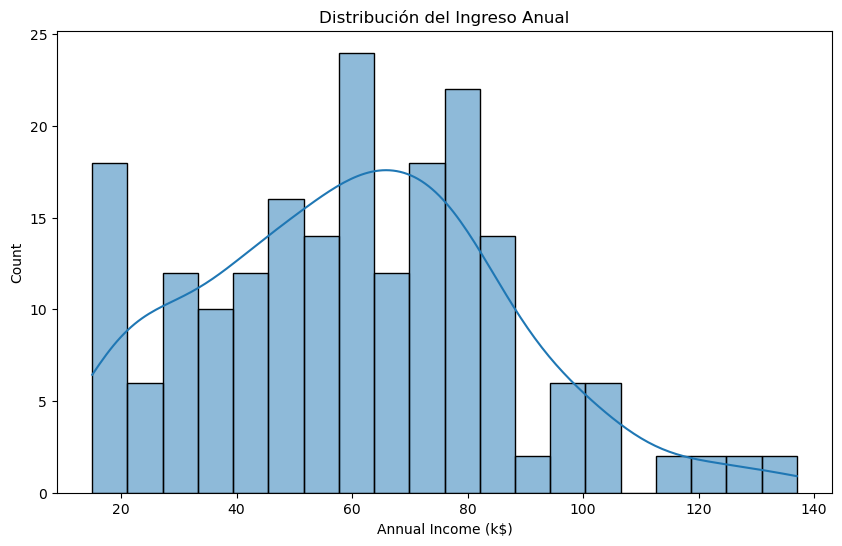

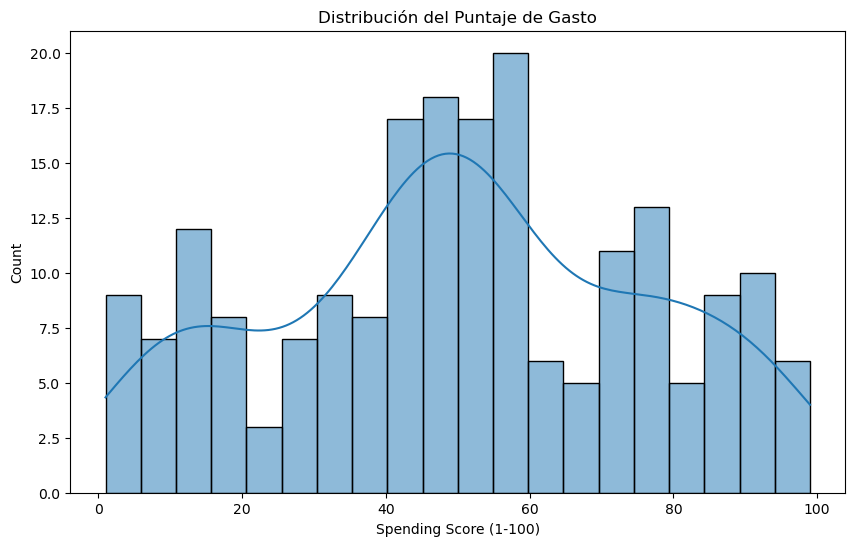

In [28]:
# Revisar la distribución de la edad, ingresos y puntaje de gasto
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], kde=True, bins=20)
plt.title('Distribución de la Edad')

plt.figure(figsize=(10, 6))
sns.histplot(data['Annual Income (k$)'], kde=True, bins=20)
plt.title('Distribución del Ingreso Anual')

plt.figure(figsize=(10, 6))
sns.histplot(data['Spending Score (1-100)'], kde=True, bins=20)
plt.title('Distribución del Puntaje de Gasto')

2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

In [30]:
# Eliminar cualquier valor nulo (si lo hubiera)
data = data.dropna()

In [32]:
# Convertir las variables categóricas (como el género) en variables numéricas si es necesario
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

In [34]:
# Seleccionar las características relevantes para el modelo
features = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [36]:
# Estandarizar los datos (es importante para algoritmos como el clustering)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [38]:
# Mostrar la versión escalada de las características
features_scaled[:5]

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992]])

3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

In [40]:
# Clasificar a los clientes según su comportamiento de gasto (Gasto Alto o Gasto Bajo)
data['Gasto_Alto'] = np.where(data['Spending Score (1-100)'] >= 50, 1, 0)

In [42]:
# Ver la distribución de clientes por comportamiento de gasto
data['Gasto_Alto'].value_counts()

Gasto_Alto
1    102
0     98
Name: count, dtype: int64

In [44]:
# Mostrar las primeras filas para verificar la nueva columna
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Gasto_Alto
0,1,0,19,15,39,0
1,2,0,21,15,81,1
2,3,1,20,16,6,0
3,4,1,23,16,77,1
4,5,1,31,17,40,0


4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.

In [46]:
# Para fines de visualización posterior, dividimos los datos en 80% entrenamiento y 20% test
X_train, X_test = train_test_split(features_scaled, test_size=0.2, random_state=42)

In [48]:
print (X_train)

[[ 0.7284319  -0.25039146 -0.3183368 ]
 [-0.49160182  2.49780745  0.92395314]
 [-0.20453507 -0.89927175 -0.93948177]
 [ 1.08726535 -1.24279661 -1.4053405 ]
 [ 0.08253169  0.32214998  0.30280817]
 [-0.27630176  2.26879087  1.11806095]
 [-1.13750203 -1.20462718  1.42863343]
 [-0.27630176 -1.43364376  1.8556706 ]
 [-0.49160182  0.58933599  1.42863343]
 [ 1.15903204 -0.13588317  0.30280817]
 [-1.49633548  0.16947227 -0.08540743]
 [-0.20453507  1.00919971  1.62274124]
 [-1.20926872 -1.66266033  1.00159627]
 [ 0.29783176  0.39848884 -0.59008772]
 [ 0.7284319   0.16947227  0.34162973]
 [ 1.51786549 -0.40306917  0.22516505]
 [ 1.30256542  0.55116656 -1.75473454]
 [ 0.65666521  0.01679455 -0.3183368 ]
 [-0.20453507  1.00919971 -1.56062674]
 [ 0.58489852 -0.02137488 -0.12422899]
 [-0.49160182  1.00919971  0.49691598]
 [-0.85043527 -0.02137488 -0.00776431]
 [-1.28103541 -1.16645776  0.88513158]
 [ 1.37433211 -1.54815205 -1.36651894]
 [-1.28103541 -1.05194947  1.19570407]
 [ 0.80019859  0.24581112

In [50]:
print (X_test)

[[-1.06573534 -0.02137488  0.06987881]
 [-1.20926872 -1.54815205  1.11806095]
 [ 1.51786549 -1.16645776 -1.7935561 ]
 [-0.34806844  0.66567484 -1.91002079]
 [ 1.4460988   0.39848884 -1.52180518]
 [-1.42456879  0.16947227 -0.00776431]
 [-0.49160182 -0.47940803 -0.12422899]
 [ 0.08253169  1.00919971 -1.44416206]
 [ 0.94373197  1.04736914 -1.44416206]
 [-1.06573534 -0.82293289  0.5745591 ]
 [ 0.29783176 -0.47940803 -0.00776431]
 [ 0.51313183  1.42906343 -1.36651894]
 [-0.20453507  0.93286085  0.96277471]
 [-1.13750203 -0.25039146  0.06987881]
 [ 1.08726535  1.54357172 -1.01712489]
 [-0.85043527  1.04736914  0.72984534]
 [ 0.87196528 -0.63208575 -0.00776431]
 [ 0.36959845  0.66567484 -1.17241113]
 [ 2.02023231 -0.25039146 -0.35715836]
 [-1.42456879 -0.47940803  0.34162973]
 [-1.13750203  0.36031941 -0.82301709]
 [-0.27630176 -1.50998262 -0.59008772]
 [-0.34806844  0.66567484 -1.09476801]
 [ 0.08253169 -0.02137488 -0.39597992]
 [-1.49633548 -0.47940803  0.34162973]
 [ 2.23553238 -0.55574689

5. Entrenar el modelo configurando los diferentes hiperparámetros.

In [52]:
# Generar el enlace para el dendrograma
Z = linkage(features_scaled, method='ward')

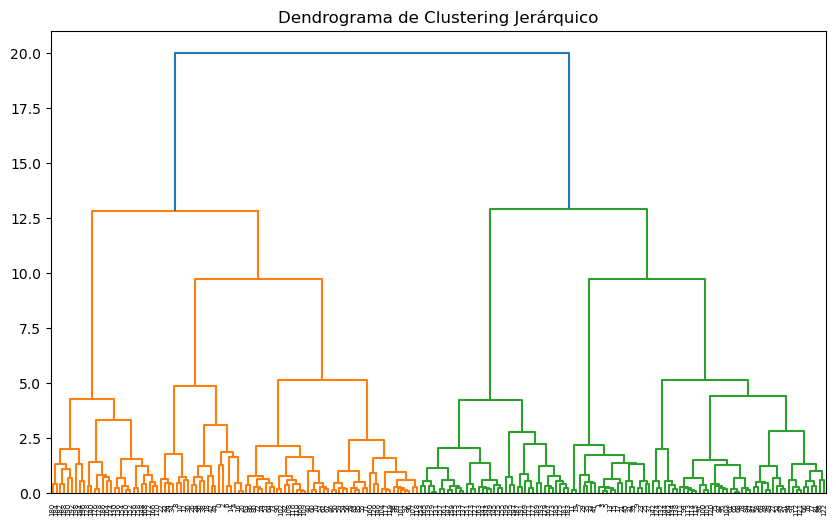

In [54]:
# Crear el dendrograma
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.title('Dendrograma de Clustering Jerárquico')
plt.show()

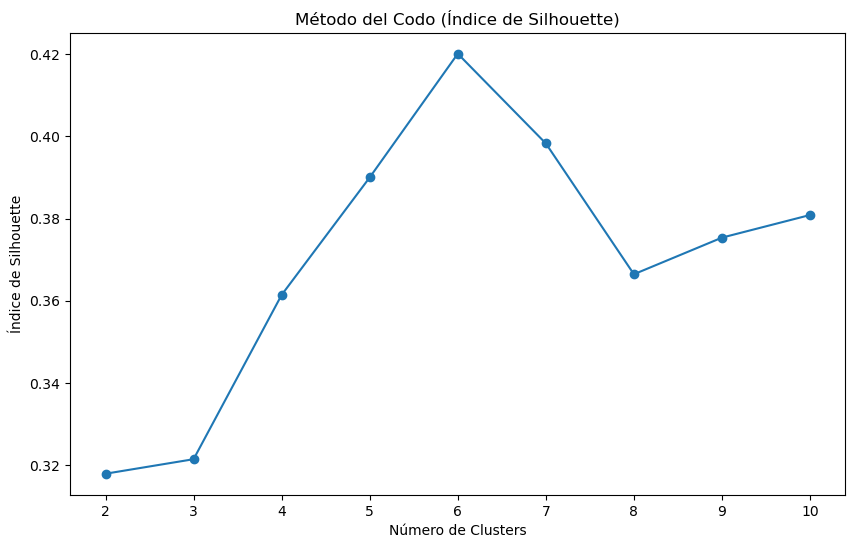

In [56]:
# Método del codo para determinar el mejor número de clusters
sse = []
range_clusters = range(2, 11)
for k in range_clusters:
    hc_temp = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='ward')
    labels_temp = hc_temp.fit_predict(features_scaled)
    sse.append(silhouette_score(features_scaled, labels_temp))

plt.figure(figsize=(10, 6))
plt.plot(range_clusters, sse, marker='o')
plt.title('Método del Codo (Índice de Silhouette)')
plt.xlabel('Número de Clusters')
plt.ylabel('Índice de Silhouette')
plt.show()

In [58]:
# Aplicar el modelo de clustering
hc = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(features_scaled)

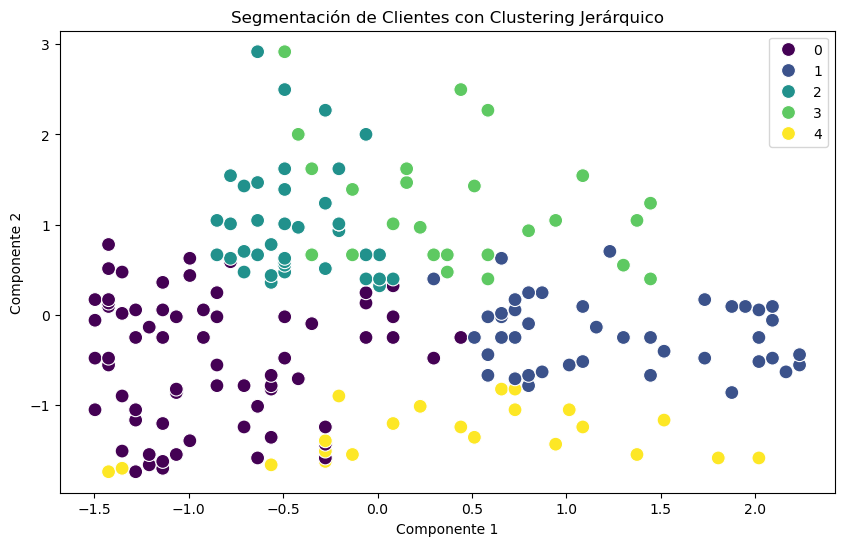

In [60]:
# Visualizar los resultados del clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x=features_scaled[:, 0], y=features_scaled[:, 1], hue=y_hc, palette='viridis', s=100)
plt.title('Segmentación de Clientes con Clustering Jerárquico')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.show()

Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.




In [62]:
# Agregar el cluster asignado al dataset original
data['Cluster'] = y_hc

In [64]:
# Analizar las características de los clientes en cada cluster
data.groupby('Cluster').mean()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Gasto_Alto
Cluster,,,,,,
0,70.545455,0.606061,26.560606,47.363636,56.787879,0.666667
1,86.666667,0.533333,56.400000,55.288889,48.355556,0.422222
2,162.000000,0.538462,32.692308,86.538462,82.128205,1.000000
3,169.214286,0.500000,43.892857,91.285714,16.678571,0.000000
4,22.181818,0.590909,44.318182,25.772727,20.272727,0.000000


In [66]:
# Evaluación del modelo
silhouette_avg = silhouette_score(features_scaled, y_hc)
calinski = calinski_harabasz_score(features_scaled, y_hc)
davies_bouldin = davies_bouldin_score(features_scaled, y_hc)

print(f'Índice de Silhouette: {silhouette_avg:.4f}')
print(f'Índice de Calinski-Harabasz: {calinski:.4f}')
print(f'Índice de Davies-Bouldin: {davies_bouldin:.4f}')

Índice de Silhouette: 0.3900
Índice de Calinski-Harabasz: 107.8266
Índice de Davies-Bouldin: 0.9163


In [70]:
# Ver las estadísticas de cada cluster
data.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].describe()

Age                                                        \
        count       mean        std   min    25%   50%    75%   max   
Cluster                                                               
0        66.0  26.560606   7.043008  18.0  21.00  24.5  31.00  45.0   
1        45.0  56.400000   8.373117  43.0  49.00  54.0  65.00  70.0   
2        39.0  32.692308   3.728650  27.0  30.00  32.0  35.50  40.0   
3        28.0  43.892857   8.337063  32.0  36.75  43.5  47.75  59.0   
4        22.0  44.318182  12.800247  19.0  35.25  45.5  52.75  67.0   

        Annual Income (k$)             ...                \
                     count       mean  ...    75%    max   
Cluster                                ...                 
0                     66.0  47.363636  ...  62.00   81.0   
1                     45.0  55.288889  ...  63.00   79.0   
2                     39.0  86.538462  ...  95.00  137.0   
3                     28.0  91.285714  ...  99.50  137.0   
4                     22.0  25.772727  ...  32.25   39.0   

        Spending Score (1-100)                                           \
                         count       mean        std   min    25%   50%   
Cluster                                                                   
0                         66.0  56.787879  20.628222   5.0  46.25  55.0   
1                         45.0  48.355556   6.869417  35.0  43.00  48.0   
2                         39.0  82.128205   9.364489  63.0  74.50  83.0   
3                         28.0  16.678571   8.973432   1.0  10.75  16.0   
4                         22.0  20.272727  12.947446   3.0   7.75  16.0   

                      
           75%   max  
Cluster               
0        73.00  99.0  
1        55.00  60.0  
2        90.00  97.0  
3        22.25  39.0  
4        31.75  40.0  

[5 rows x 24 columns]

Text(0.5, 1.0, 'Distribución del Ingreso Anual por Cluster')

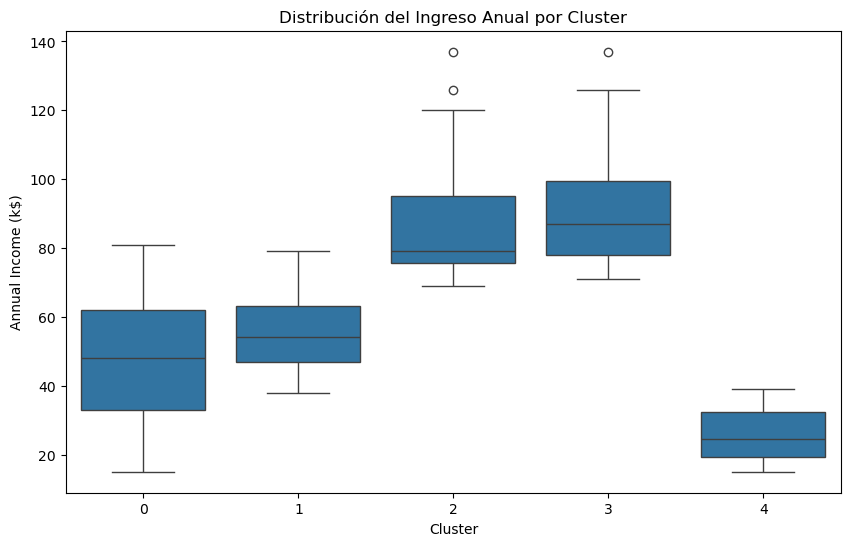

In [72]:
# Comparar la distribución de los ingresos y puntajes de gasto en cada cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Annual Income (k$)', data=data)
plt.title('Distribución del Ingreso Anual por Cluster')

Text(0.5, 1.0, 'Distribución del Puntaje de Gasto por Cluster')

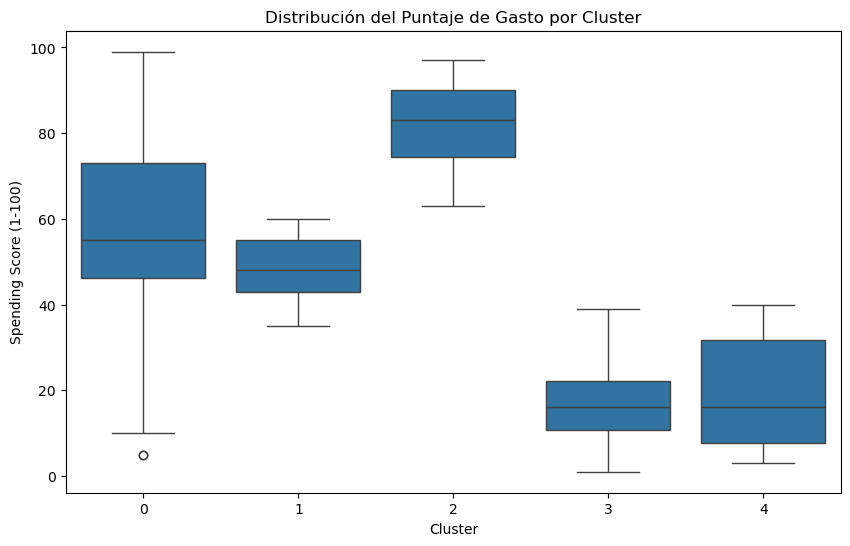

In [74]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Spending Score (1-100)', data=data)
plt.title('Distribución del Puntaje de Gasto por Cluster')

In [76]:
# Interpretación basada en los clusters obtenidos
# Por ejemplo, podemos observar las medias de las variables en cada cluster y hacer inferencias sobre el tipo de clientes
data.groupby('Cluster').mean()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Gasto_Alto
Cluster,,,,,,
0,70.545455,0.606061,26.560606,47.363636,56.787879,0.666667
1,86.666667,0.533333,56.400000,55.288889,48.355556,0.422222
2,162.000000,0.538462,32.692308,86.538462,82.128205,1.000000
3,169.214286,0.500000,43.892857,91.285714,16.678571,0.000000
4,22.181818,0.590909,44.318182,25.772727,20.272727,0.000000


Interpretación de los Clusters en el Dataset de Clientes
En el análisis de clustering realizado, se identificaron cinco grupos de clientes (clusters), cada uno con características distintas:

Cluster 0: Este grupo está compuesto principalmente por clientes jóvenes (promedio de 26.56 años), en su mayoría mujeres (60.6%), con ingresos moderados de aproximadamente 47.36 k$ anuales. Estos clientes presentan un comportamiento de gasto relativamente alto (Spending Score de 56.78) y la mayoría de ellos (66.67%) son clasificados como clientes de "Gasto Alto". Esto sugiere que este grupo incluye a personas jóvenes que disfrutan gastando en productos y servicios.

Cluster 1: Los clientes de este grupo son principalmente adultos (promedio de 56.4 años), también en su mayoría mujeres (53.3%), con ingresos moderados (55.29 k$ anuales) y un comportamiento de gasto promedio (48.36). Solo el 42.22% son clasificados como clientes de "Gasto Alto", lo que indica que muchos de ellos prefieren un comportamiento de gasto más conservador, posiblemente debido a su edad.

Cluster 2: Este es el grupo de clientes más interesante para el negocio, ya que está compuesto por personas jóvenes (32.69 años en promedio), con altos ingresos (86.54 k$) y un comportamiento de gasto elevado (82.13). El 100% de estos clientes son clasificados como de "Gasto Alto", lo que los convierte en clientes ideales para ofertas premium o productos exclusivos. Además, su distribución de género es equilibrada (53.8% mujeres).

Cluster 3: Estos clientes son de edad media (43.89 años en promedio), con ingresos altos (91.29 k$), pero tienen un comportamiento de gasto muy bajo (16.68). Ninguno de ellos es clasificado como cliente de "Gasto Alto". Esto sugiere que, a pesar de tener capacidad económica, prefieren ahorrar o son muy selectivos en sus compras. Este grupo podría ser el objetivo de estrategias para incentivarlos a gastar más.

Cluster 4: El último grupo está compuesto por clientes de edad media (44.32 años en promedio), con bajos ingresos (25.77 k$) y un comportamiento de gasto bajo (20.27). Ninguno de ellos es clasificado como cliente de "Gasto Alto". Esto indica que son personas con bajo poder adquisitivo, por lo que podrían estar interesadas en productos económicos y promociones de ahorro.

En conclusión, este análisis permite comprender mejor el comportamiento de los clientes y segmentarlos en función de sus características y hábitos de gasto. Esto es útil para diseñar estrategias de marketing dirigidas a cada grupo específico. Por ejemplo, las promociones exclusivas pueden enfocarse en el Cluster 2, mientras que las campañas de ahorro o productos económicos podrían orientarse al Cluster 4.